In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from IPython.display import Markdown
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import numpy as np
import random as rnd
import seaborn as sns

In [2]:
N_SEED = 19
TOP_K = 5
VERBOSE = 1
N_JOBS = 4

COLOR_MAP = "RdYlBu"
L_FONT = {
    "color": "darkblue",
    "size": 11
}

T_COLOR = "darkred"

np.random.seed(N_SEED)
plt.style.use("ggplot")

In [3]:
X, y = load_breast_cancer(return_X_y=True)

## EDA

In [4]:
def show_corr(features, target):
    plt.figure(figsize=(19, 15))
    features.corrwith(target).plot.bar(color="purple", grid=True)
    ax = plt.gca()
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(T_COLOR)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(T_COLOR)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def show_corr_heatmap(data):
    corr = data.corr() * 100
    plt.figure(figsize=(20, 15))
    sns.heatmap(corr, annot=True, cmap=COLOR_MAP, fmt=".2f")
    ax = plt.gca()
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(T_COLOR)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(T_COLOR)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def plot_features(x, target):
    _, col = x.shape
    for i in range(col):
        plt.scatter(x[:, i], target, color="red", s=4,)
        plt.xlabel("X: {i}".format(i=i), fontdict=L_FONT)
        plt.ylabel("Target", fontdict=L_FONT)
        ax = plt.gca()
        ax.spines["bottom"].set_color(T_COLOR)
        ax.spines["top"].set_color(None)
        ax.spines["left"].set_color(T_COLOR)
        ax.spines["right"].set_color(None)
        ax.tick_params(axis="x", colors=T_COLOR)
        ax.tick_params(axis="y", colors=T_COLOR)
        plt.show();
        plt.hist(x[:, i], color="green")
        plt.xlabel("X: {i}".format(i=i), fontdict=L_FONT)
        plt.ylabel("Population", fontdict=L_FONT)
        ax = plt.gca()
        ax.spines["bottom"].set_color(T_COLOR)
        ax.spines["top"].set_color(None)
        ax.spines["left"].set_color(T_COLOR)
        ax.spines["right"].set_color(None)
        ax.tick_params(axis="x", colors=T_COLOR)
        ax.tick_params(axis="y", colors=T_COLOR)
        plt.show();


def plot_class_dist(target):
    unique, counts = np.unique(target, return_counts=True)
    plt.bar(unique, counts, color="darkblue",)
    plt.xlabel("Class", fontdict=L_FONT)
    plt.ylabel("Population", fontdict=L_FONT)
    ax = plt.gca()
    ax.set_xticks(ticks=unique, labels=unique)
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(None)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(None)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def plot_roc(fpr, tpr, roc_auc):
    plt.plot(fpr, tpr, color="#1ecbe1", label="AUC = %0.4f" % roc_auc,)
    plt.legend(loc = "lower right")
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel("TPR", fontdict=L_FONT)
    plt.xlabel("FPR", fontdict=L_FONT)
    ax = plt.gca()
    ax.set_title("Receiver Operating Characteristic", fontdict={"color": "darkblue"})
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(None)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(None)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def plot_classification(y_true, y_pred):
    precision, recall, f1, support = metrics.precision_recall_fscore_support(y_true, y_pred)
    sns.heatmap(
        (precision*100, recall*100, f1*100),
        annot=True, cmap=COLOR_MAP,
        fmt=".4f",
        yticklabels=("precision", "recall", "f1")
    )
    ax = plt.gca()
    ax.set_title("Classification Report", fontdict=L_FONT)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();

In [5]:
size, n_features = X.shape
size, n_features

(569, 30)

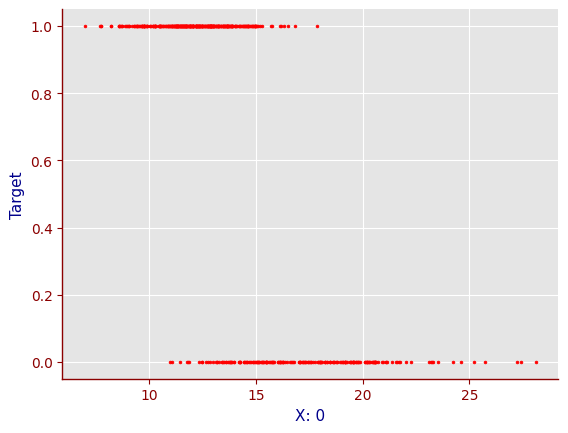

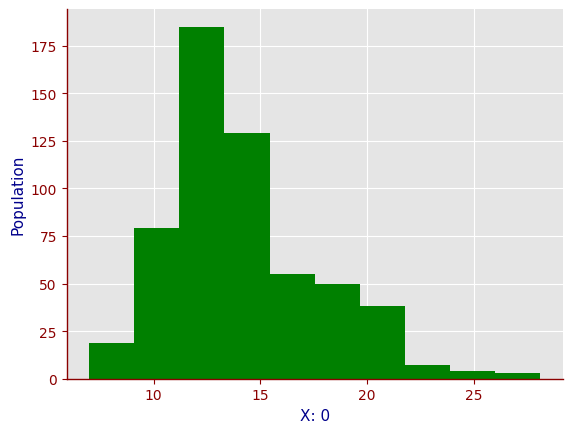

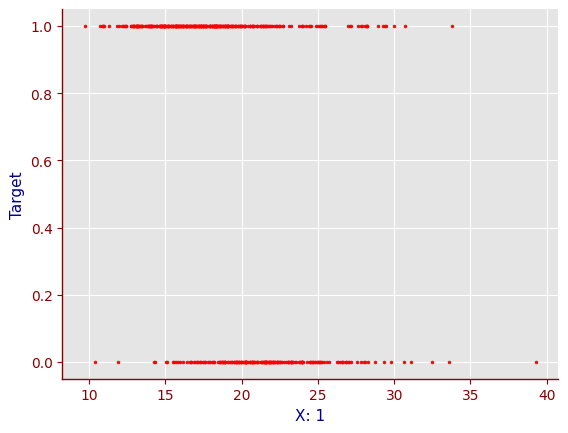

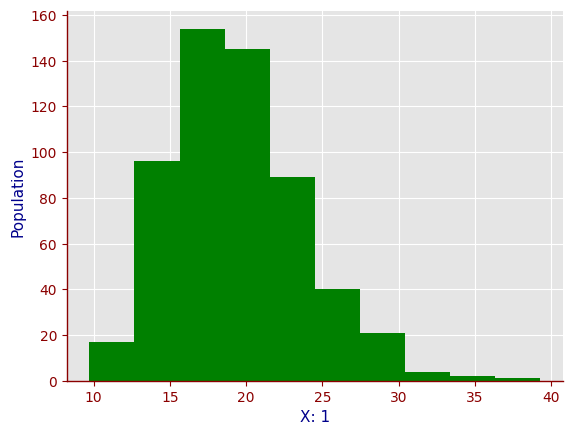

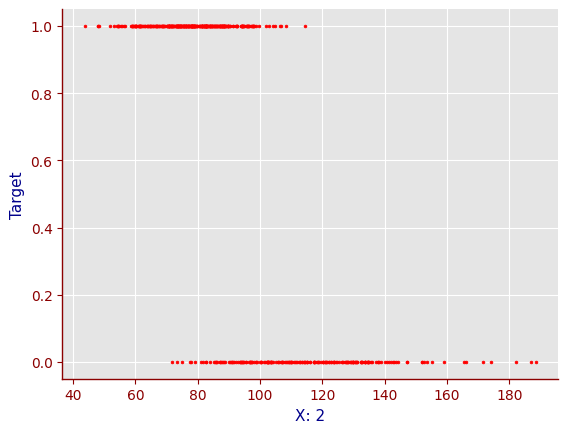

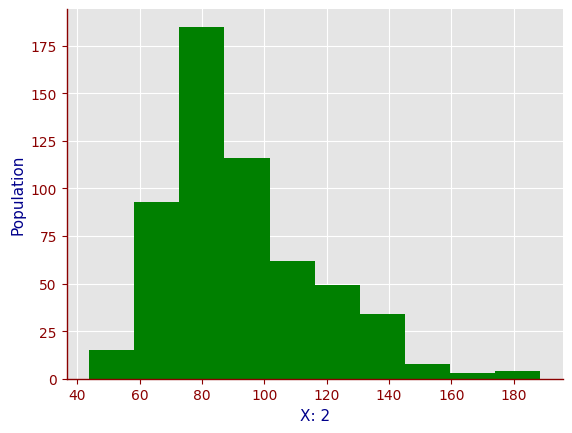

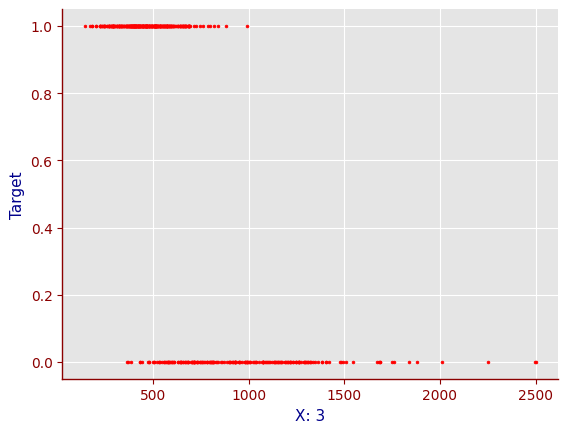

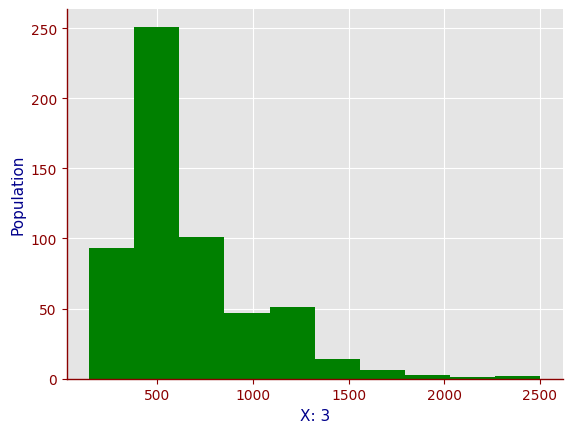

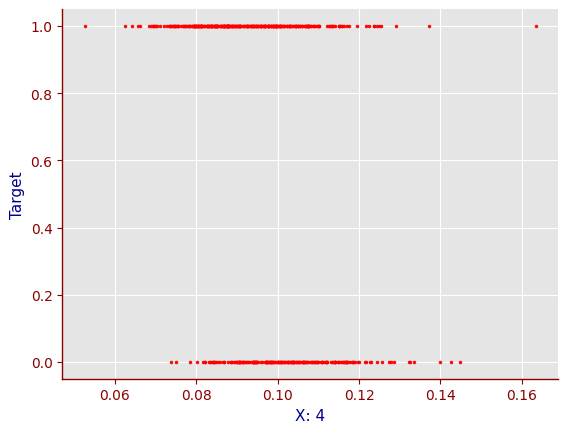

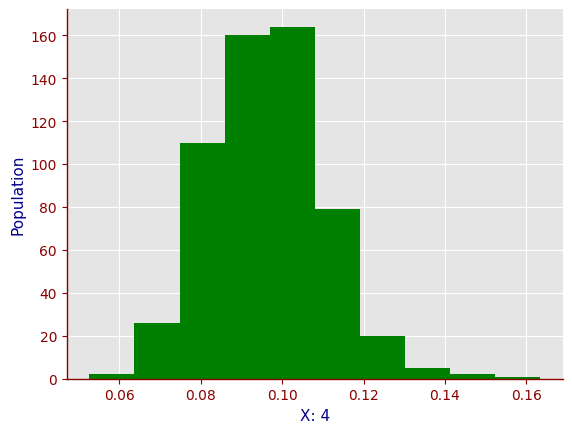

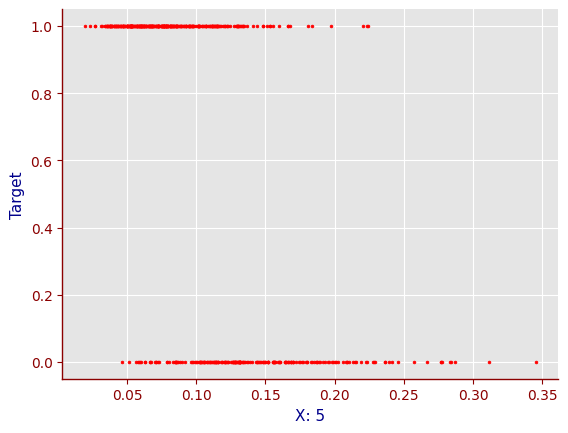

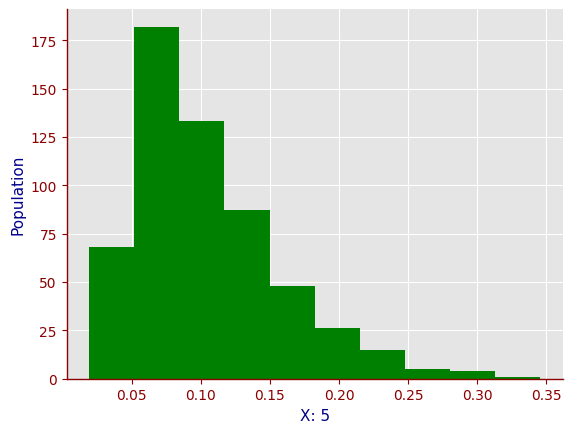

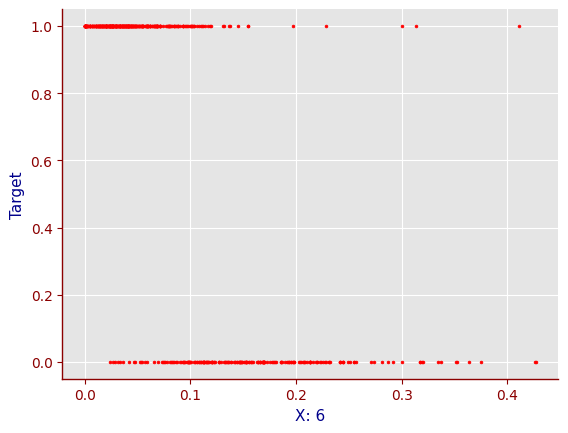

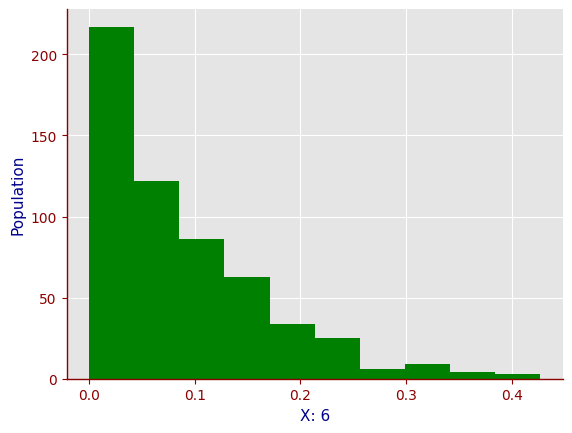

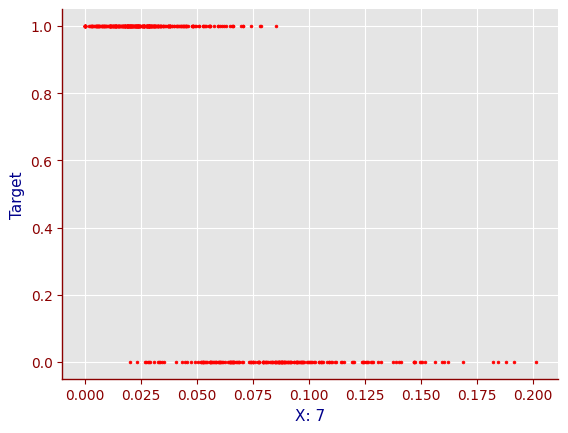

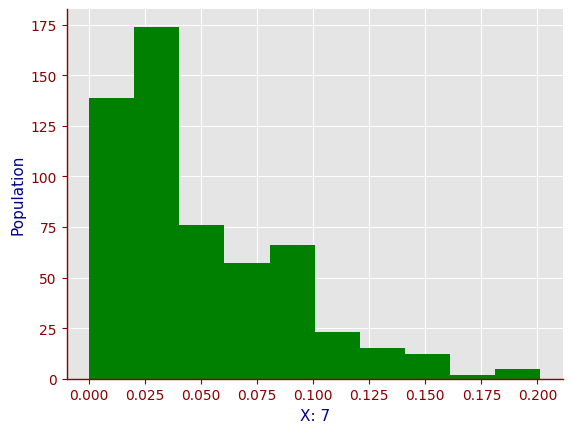

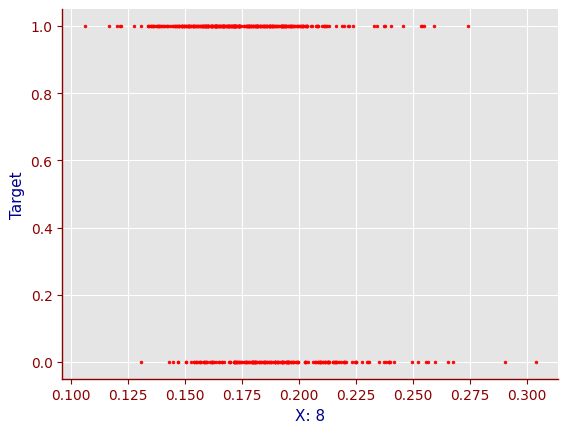

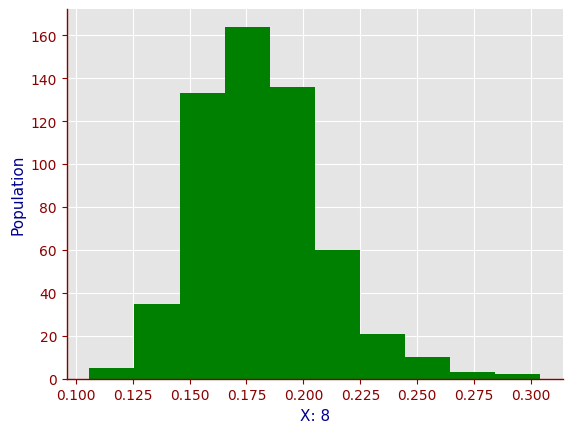

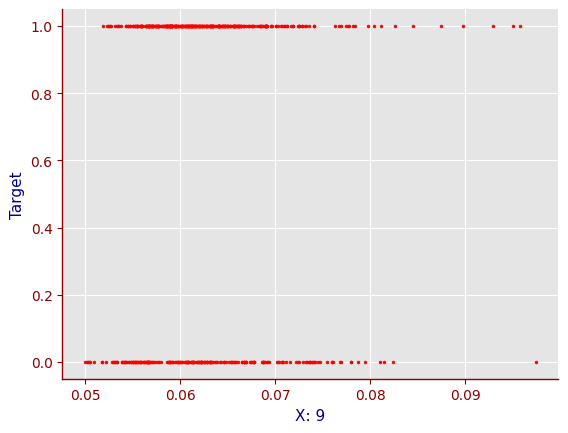

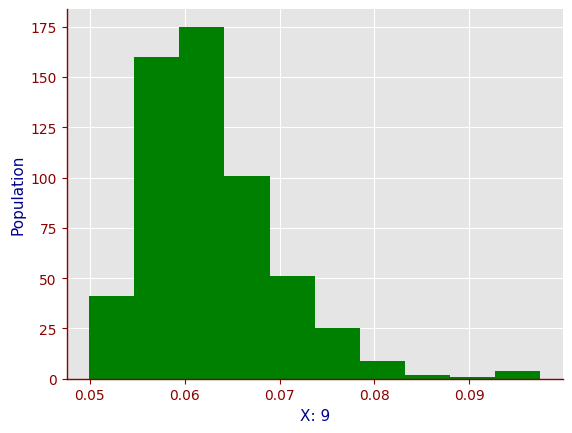

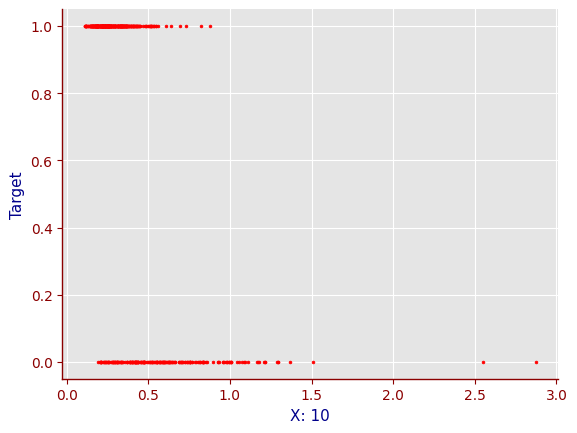

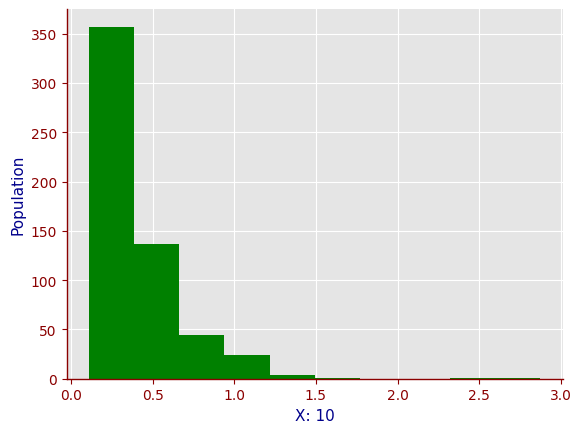

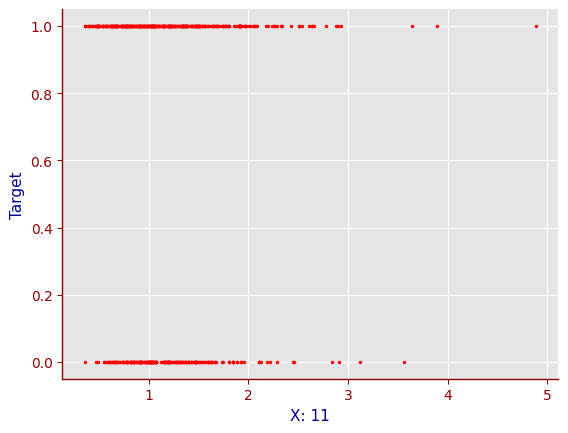

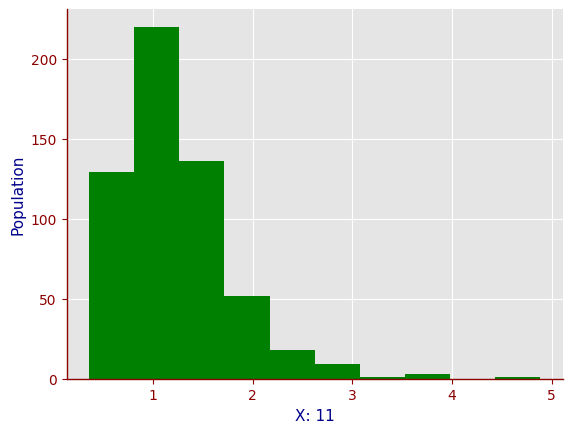

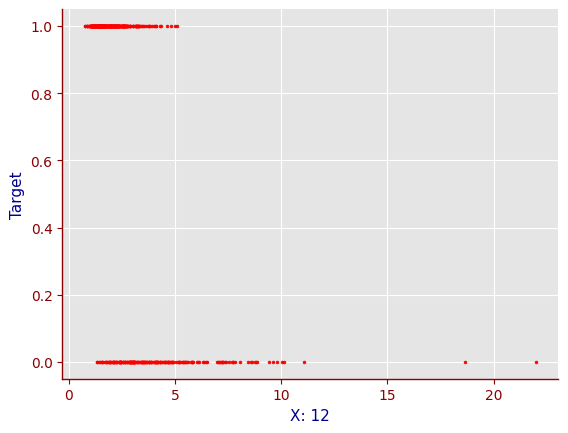

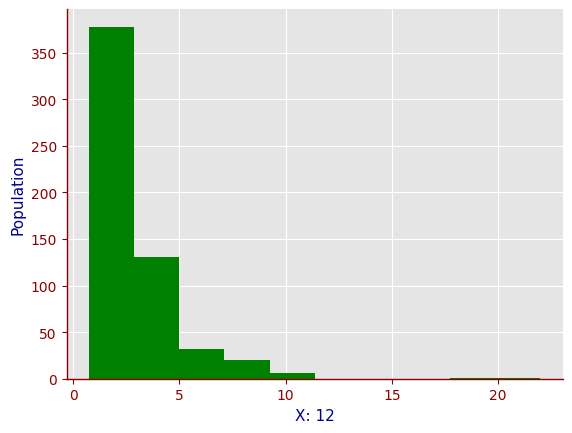

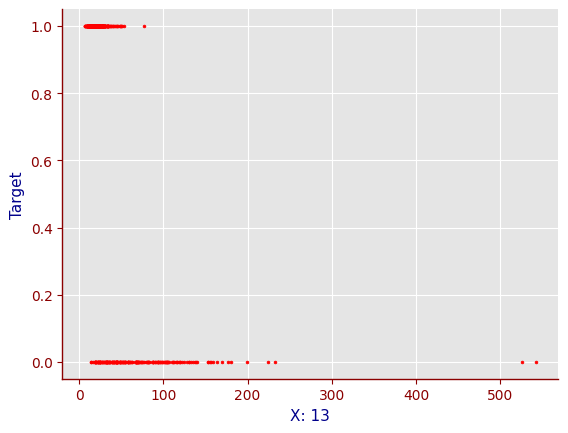

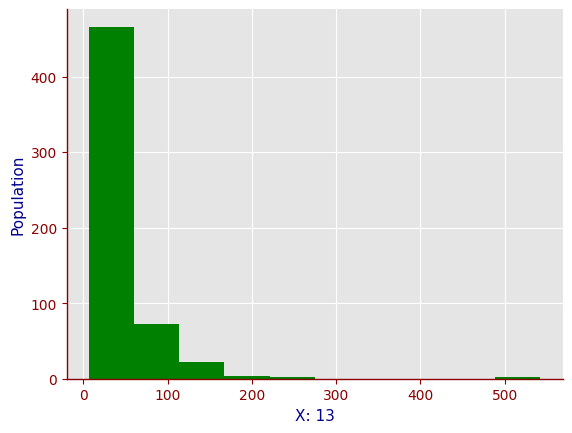

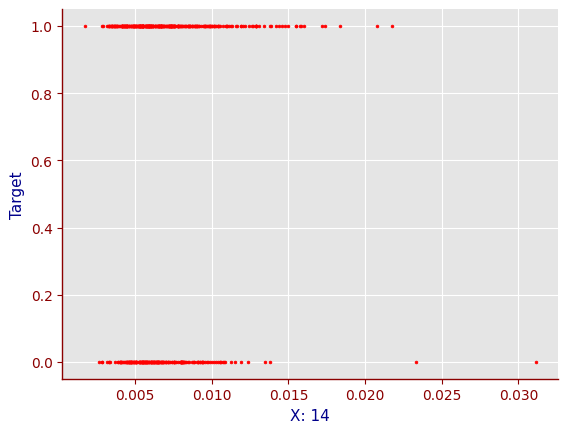

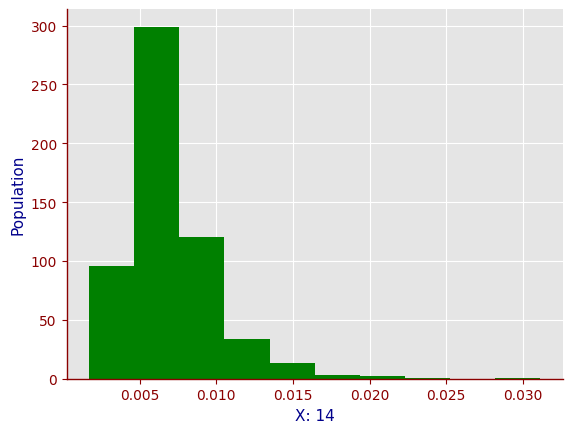

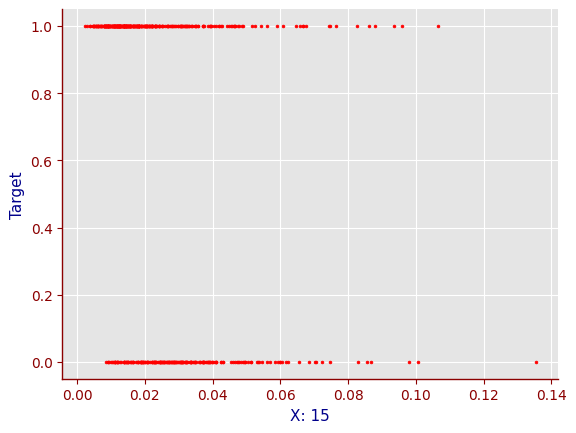

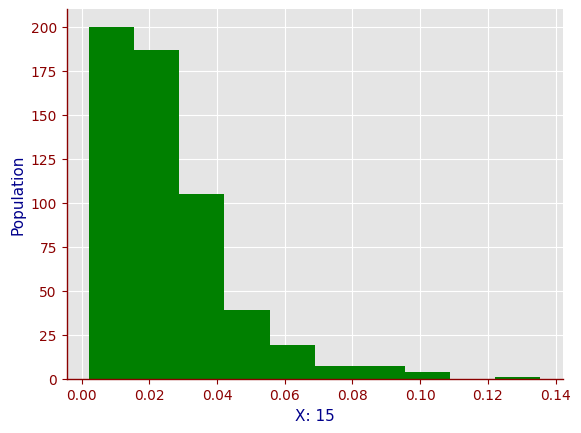

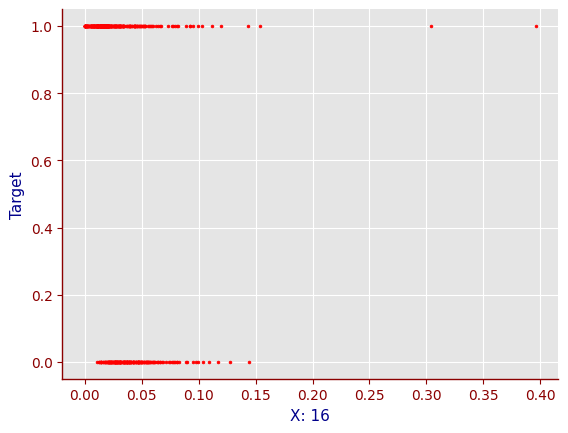

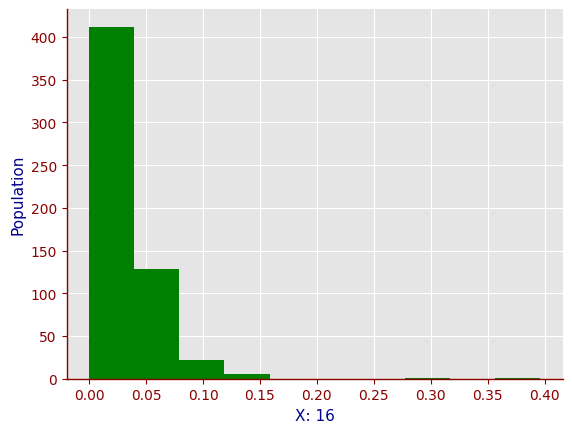

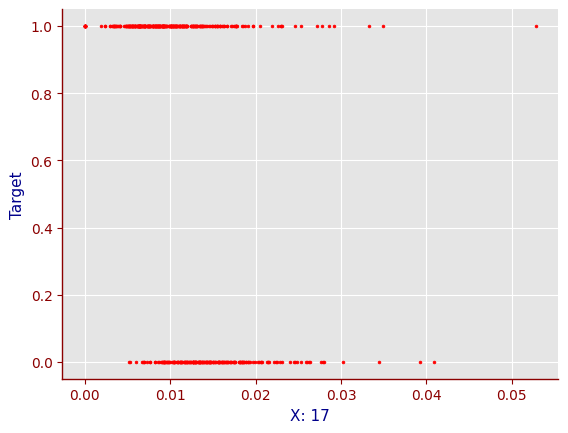

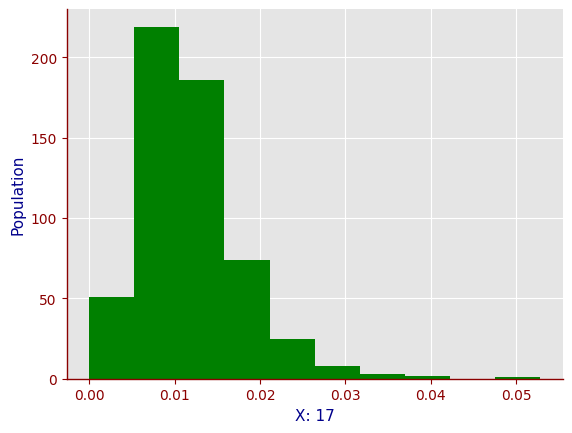

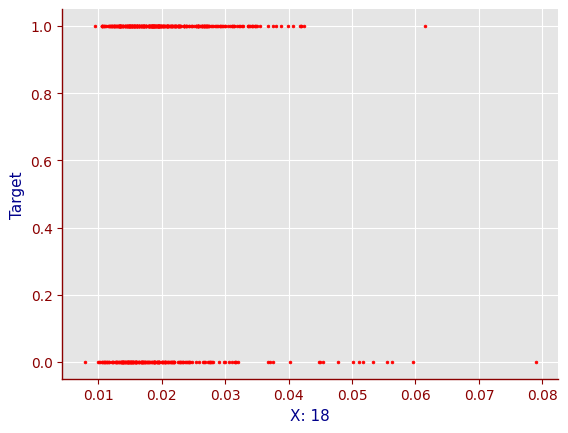

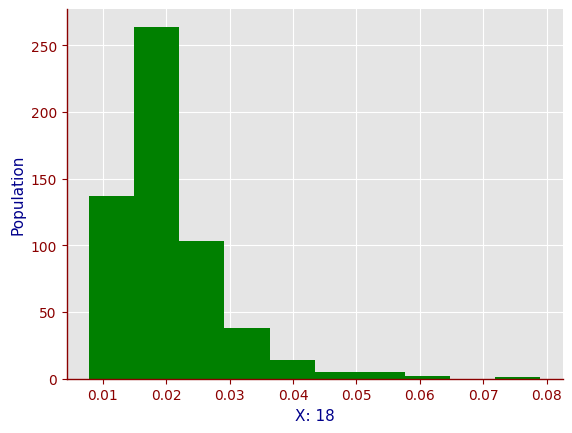

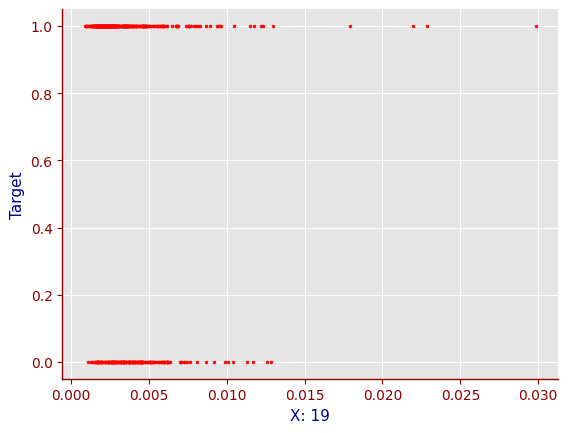

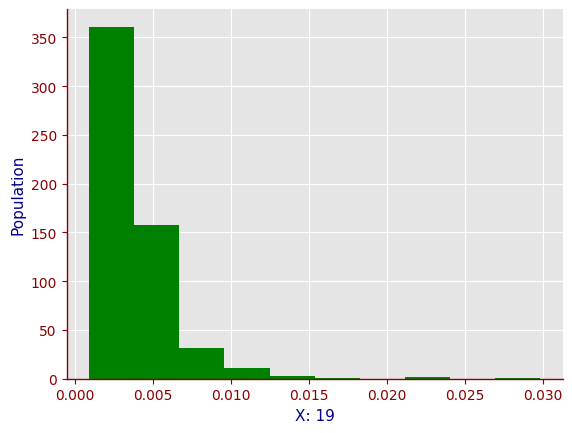

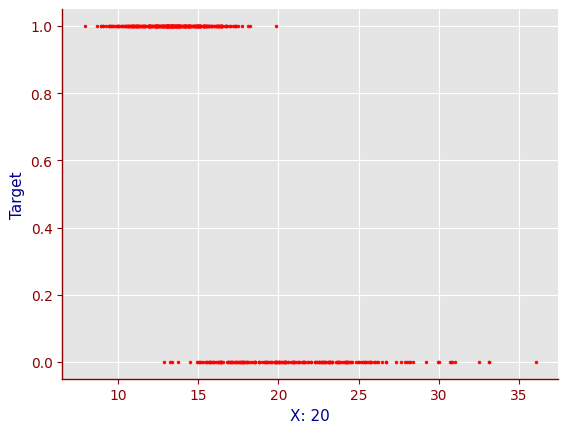

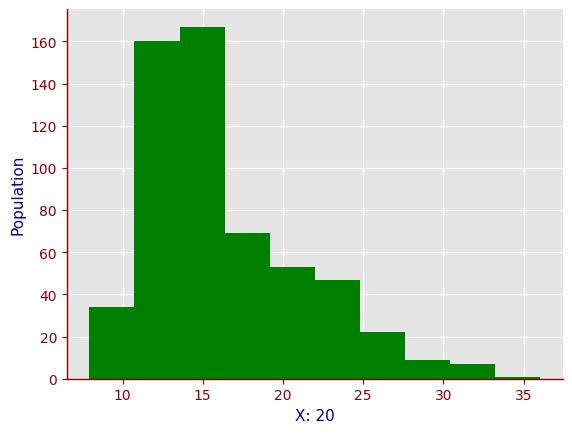

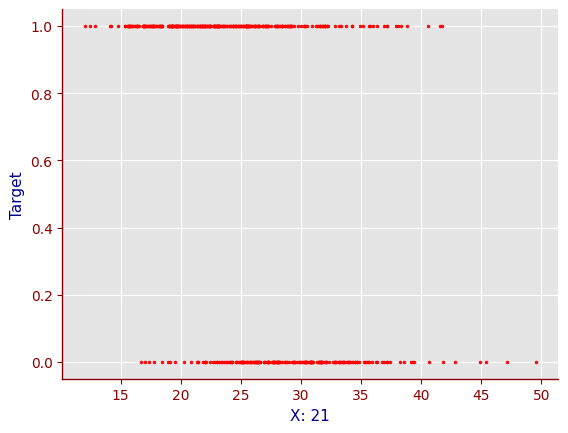

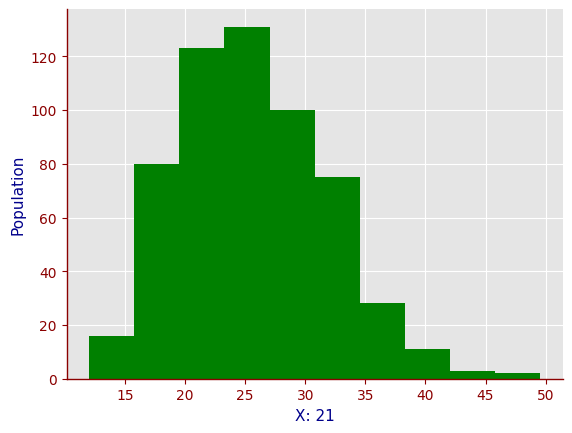

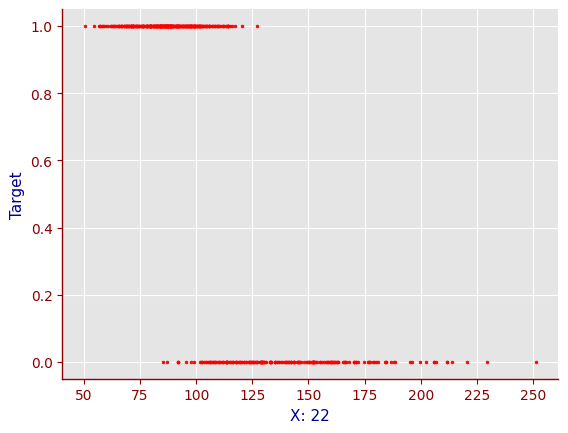

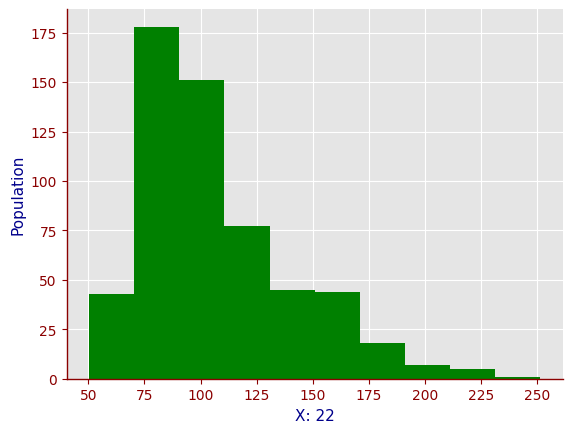

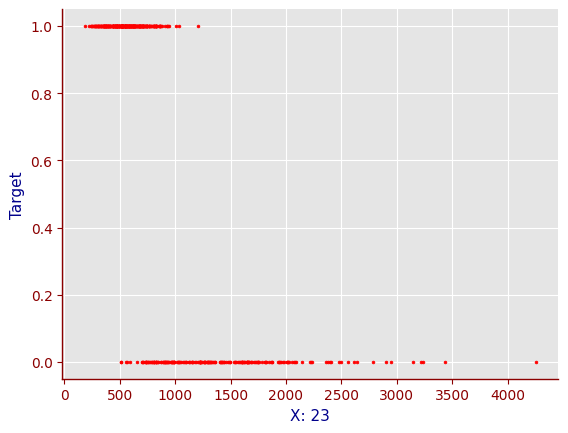

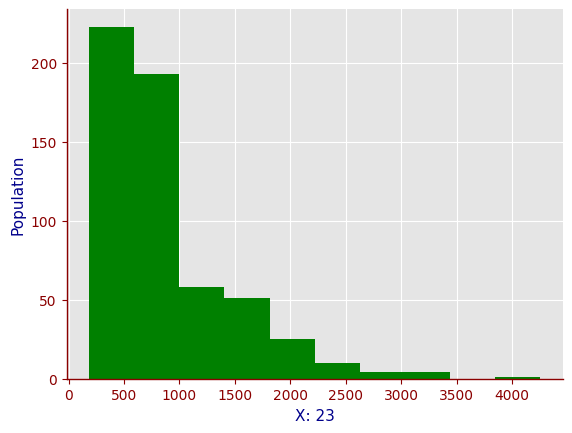

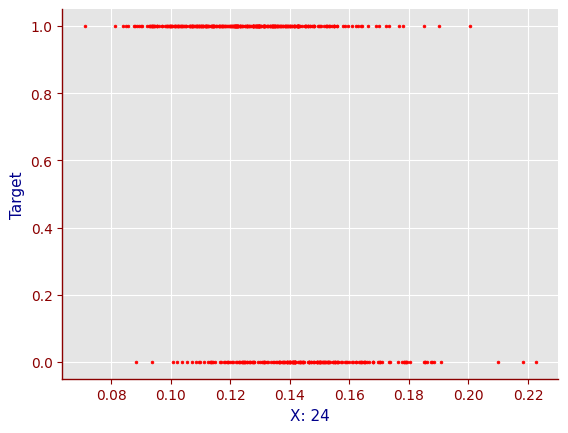

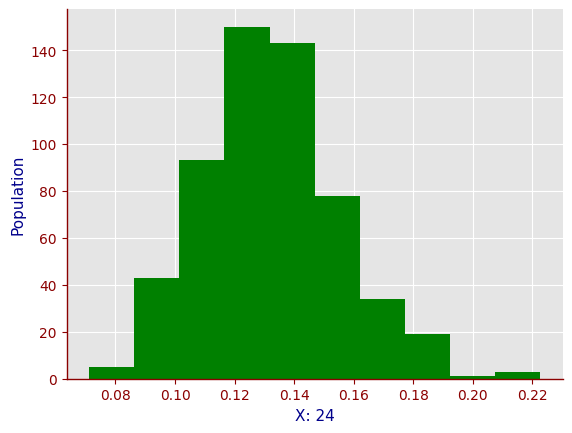

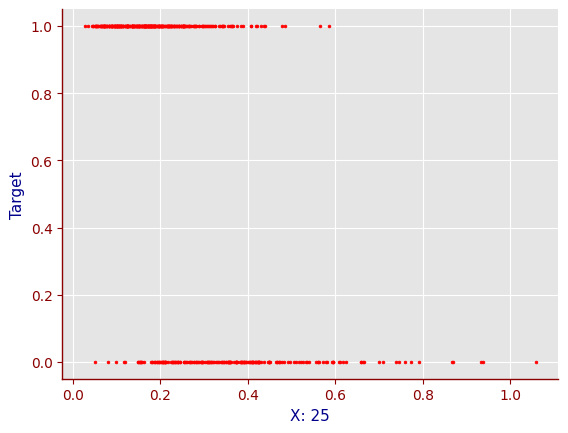

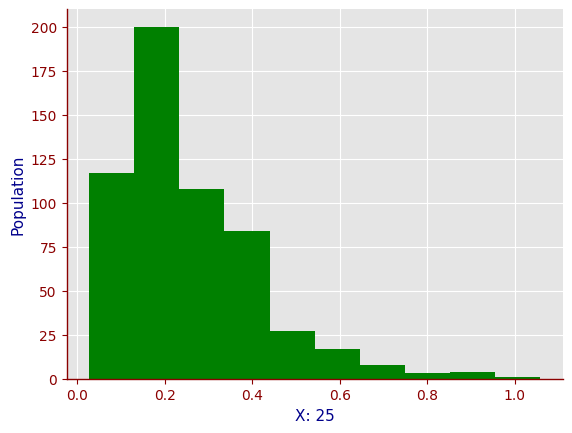

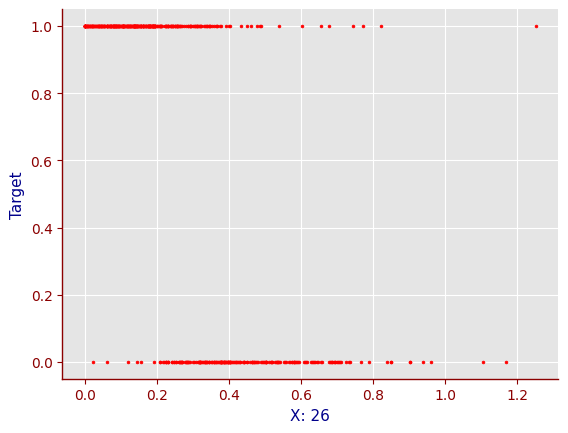

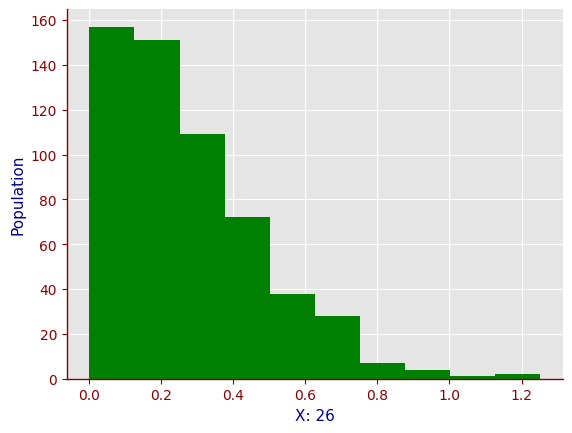

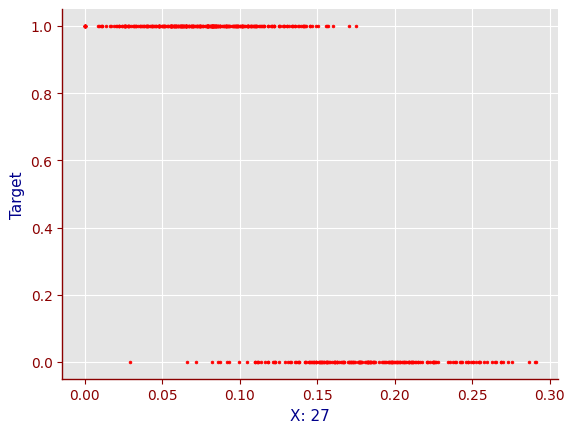

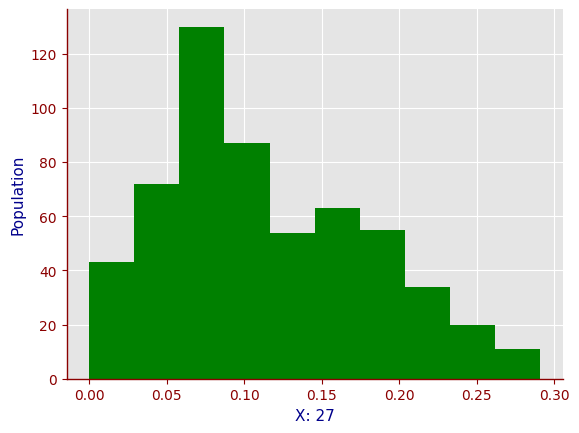

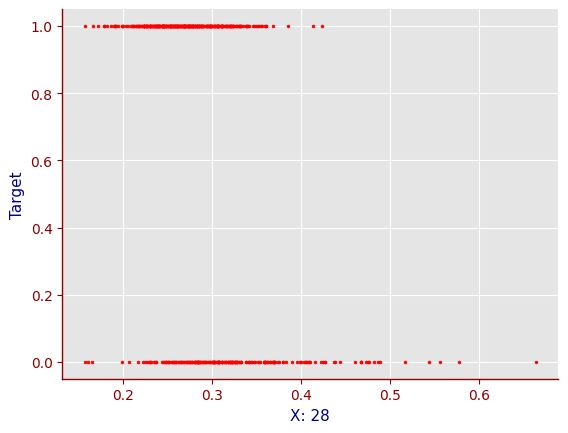

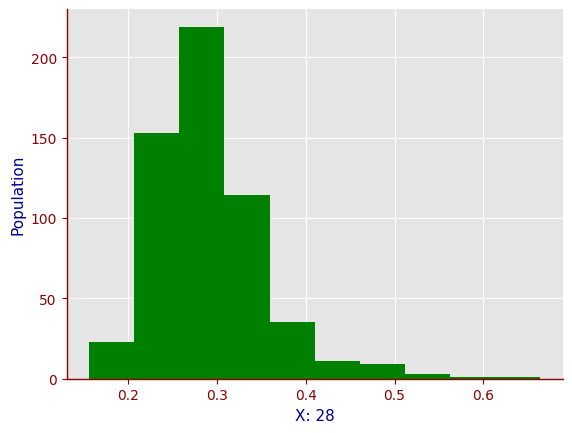

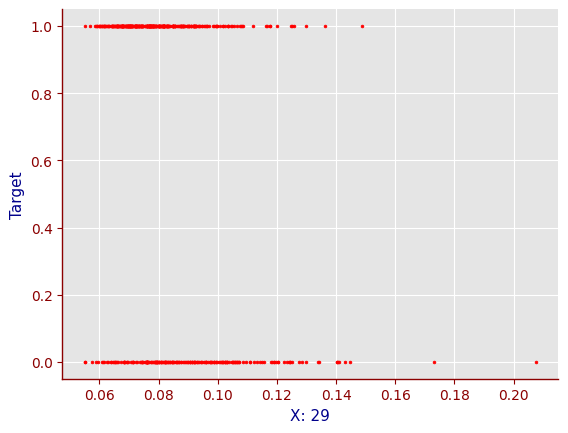

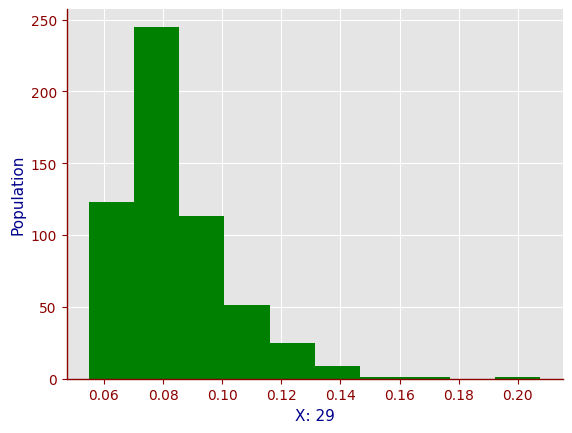

In [6]:
plot_features(X, y)

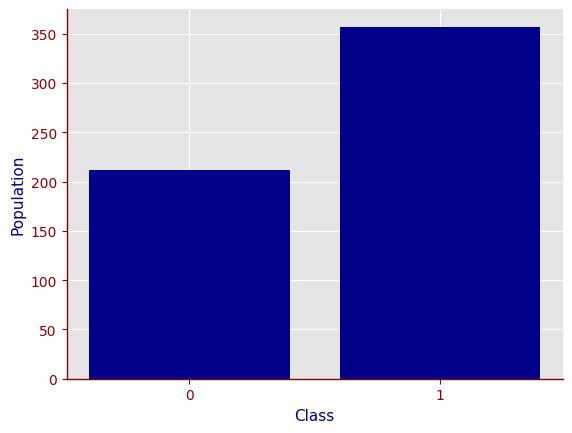

In [7]:
plot_class_dist(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=N_SEED)

## Logistic Regression

In [9]:
lr_param_grid = {
    "max_iter": [100, 150],
    "solver": ["newton-cholesky"],
    "penalty": ["l2", None],
}

lr_pipeline = make_pipeline(
    StandardScaler(),
    GridSearchCV(
        LogisticRegression(
            random_state=N_SEED,
            verbose=VERBOSE,
        ),
        param_grid=lr_param_grid,
        refit=True,)
)

lr_pipeline.fit(X_train, y_train)

Newton iter=1
  Check Convergence
    1. max |gradient| 0.10653686979703285 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.041938419214774314 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0170358026331977 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.006606196078970287 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 0.001950092152577332 <= 0.0001
Newton iter=6
  Check Convergence
    1. max |gradient| 0.0002964457194219337 <= 0.0001
Newton iter=7
  Check Convergence
    1. max |gradient| 8.976886290416874e-06 <= 0.0001
    2. Newton decrement 2.6205589108634925e-05 <= 0.0001
  Solver did converge at loss = 0.07056636878813966.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.10469747297521902 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.04169957459555965 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.017272564860048113 <= 0.0001
Newton iter=4
  Check C

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(estimator=LogisticRegression(random_state=19,
                                                           verbose=1),
                              param_grid={'max_iter': [100, 150],
                                          'penalty': ['l2', None],
                                          'solver': ['newton-cholesky']}))])

In [10]:
y_lr_pred = lr_pipeline.predict(X_test)
y_lr_prob = lr_pipeline.predict_proba(X_test) * 100
cm_lr = confusion_matrix(y_true=y_test, y_pred=y_lr_pred)

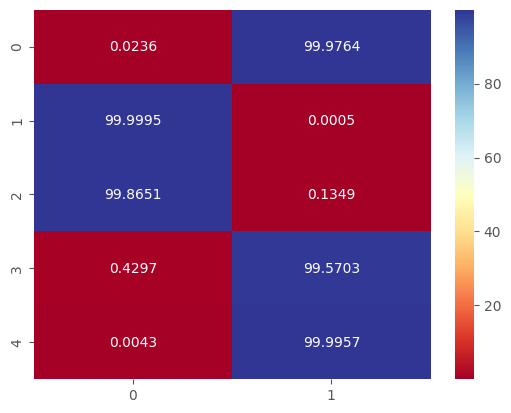

In [11]:
sns.heatmap(y_lr_prob[:TOP_K], annot=True, cmap=COLOR_MAP, fmt=".4f");

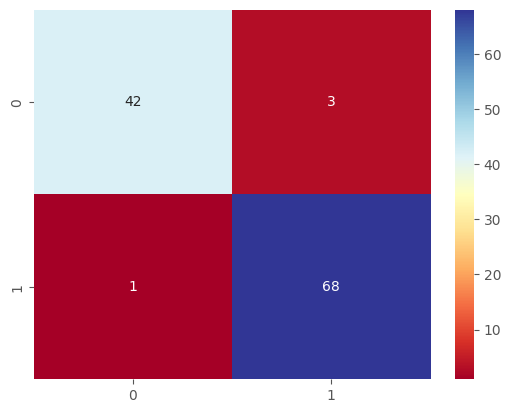

In [12]:
sns.heatmap(cm_lr, annot=True, cmap=COLOR_MAP, fmt=".0f");

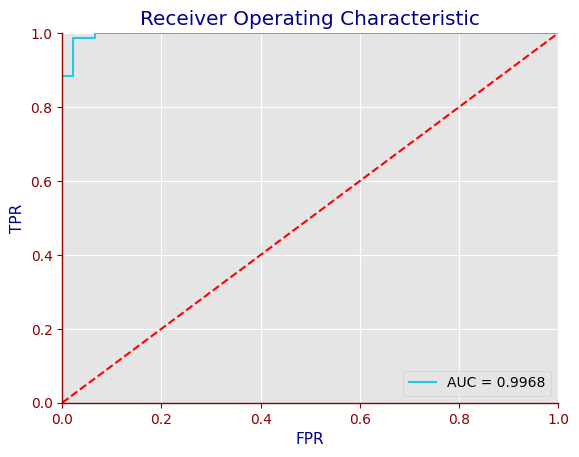

In [13]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_lr_prob[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)
plot_roc(fpr_lr, tpr_lr, roc_auc_lr)

In [14]:
lr_pipeline.score(X_test, y_test)

0.9649122807017544

In [15]:
Markdown(classification_report(y_true=y_test, y_pred=y_lr_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        45
           1       0.96      0.99      0.97        69

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


## Random Forest

In [16]:
rf_param_grid = {
    "n_estimators": [50, 80, 100],
    "max_depth": [2, 5, 8, 10],
}

rf_pipeline = make_pipeline(
    StandardScaler(),
    GridSearchCV(
        RandomForestClassifier(
            n_jobs=N_JOBS,
            random_state=N_SEED,
            verbose=VERBOSE,
        ),
        param_grid=rf_param_grid,
        cv=12,
        refit=True,)
)

rf_pipeline.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_job

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=12,
                              estimator=RandomForestClassifier(n_jobs=4,
                                                               random_state=19,
                                                               verbose=1),
                              param_grid={'max_depth': [2, 5, 8, 10],
                                          'n_estimators': [50, 80, 100]}))])

In [17]:
y_rf_pred = rf_pipeline.predict(X_test)
y_rf_prob = rf_pipeline.predict_proba(X_test) * 100
cm_rf = confusion_matrix(y_true=y_test, y_pred=y_rf_pred)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished


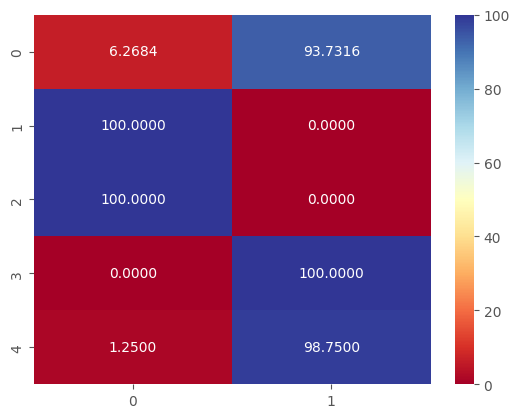

In [18]:
sns.heatmap(y_rf_prob[:TOP_K], annot=True, cmap=COLOR_MAP, fmt=".4f");

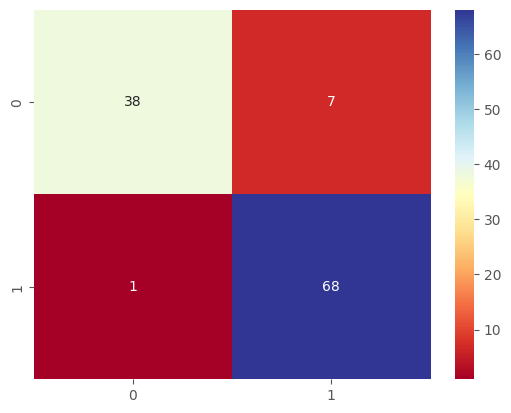

In [19]:
sns.heatmap(cm_rf, annot=True, cmap=COLOR_MAP, fmt=".0f");

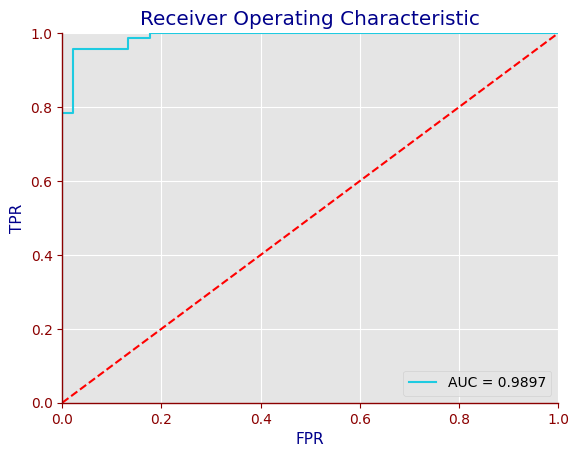

In [20]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_rf_prob[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
plot_roc(fpr_rf, tpr_rf, roc_auc_rf)

In [21]:
rf_pipeline.score(X_test, y_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished


0.9298245614035088

In [22]:
Markdown(classification_report(y_true=y_test, y_pred=y_rf_pred))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90        45
           1       0.91      0.99      0.94        69

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114


## Gradient Boosting

In [23]:
gb_pipeline = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        random_state=N_SEED,
        verbose=VERBOSE,
    ),
)

gb_pipeline.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.1376            0.32s
         2           0.9965            0.31s
         3           0.8825            0.31s
         4           0.7848            0.30s
         5           0.7035            0.29s
         6           0.6321            0.29s
         7           0.5700            0.28s
         8           0.5186            0.28s
         9           0.4703            0.27s
        10           0.4291            0.27s
        20           0.1833            0.23s
        30           0.0926            0.20s
        40           0.0489            0.17s
        50           0.0295            0.14s
        60           0.0196            0.11s
        70           0.0133            0.09s
        80           0.0089            0.06s
        90           0.0064            0.03s
       100           0.0047            0.00s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=19, verbose=1))])

In [24]:
y_gb_pred = gb_pipeline.predict(X_test)
y_gb_prob = gb_pipeline.predict_proba(X_test) * 100
cm_gb = confusion_matrix(y_true=y_test, y_pred=y_gb_pred)

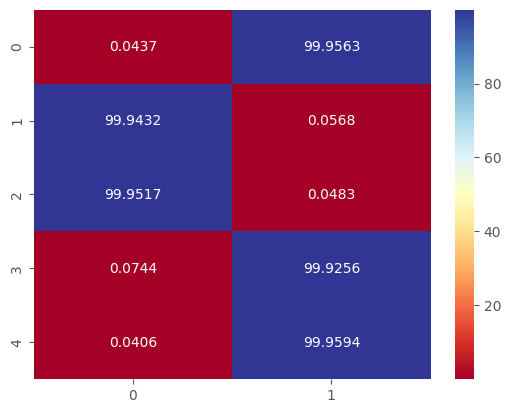

In [25]:
sns.heatmap(y_gb_prob[:TOP_K], annot=True, cmap=COLOR_MAP, fmt=".4f");

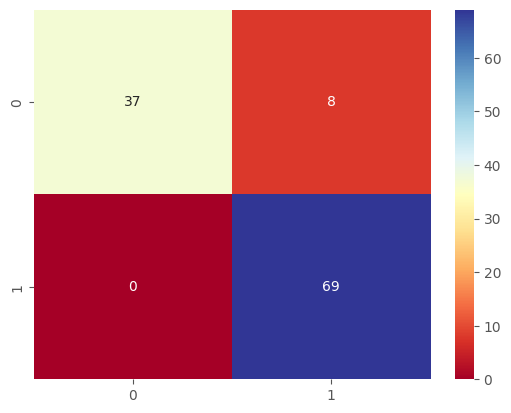

In [26]:
sns.heatmap(cm_gb, annot=True, cmap=COLOR_MAP, fmt=".0f");

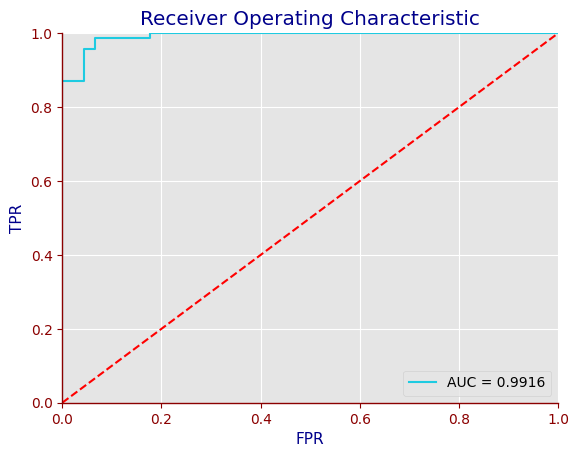

In [27]:
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_gb_prob[:, 1])
roc_auc_gb = auc(fpr_gb, tpr_gb)
plot_roc(fpr_gb, tpr_gb, roc_auc_gb)

In [28]:
gb_pipeline.score(X_test, y_test)

0.9298245614035088

In [29]:
Markdown(classification_report(y_true=y_test, y_pred=y_gb_pred))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        45
           1       0.90      1.00      0.95        69

    accuracy                           0.93       114
   macro avg       0.95      0.91      0.92       114
weighted avg       0.94      0.93      0.93       114


## XGBoost

In [30]:
params = {
    "objective": "binary:logistic",
    "n_estimators": 50,
}

xgb_model = XGBClassifier(**params).fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    verbose=VERBOSE
)

[0]	validation_0-logloss:0.43028	validation_1-logloss:0.46678
[1]	validation_0-logloss:0.30775	validation_1-logloss:0.34790
[2]	validation_0-logloss:0.22833	validation_1-logloss:0.27689
[3]	validation_0-logloss:0.17521	validation_1-logloss:0.23027
[4]	validation_0-logloss:0.13528	validation_1-logloss:0.20852
[5]	validation_0-logloss:0.10744	validation_1-logloss:0.18357
[6]	validation_0-logloss:0.08605	validation_1-logloss:0.17287
[7]	validation_0-logloss:0.07045	validation_1-logloss:0.15612
[8]	validation_0-logloss:0.06008	validation_1-logloss:0.14952
[9]	validation_0-logloss:0.05067	validation_1-logloss:0.13508
[10]	validation_0-logloss:0.04283	validation_1-logloss:0.13655
[11]	validation_0-logloss:0.03734	validation_1-logloss:0.13653
[12]	validation_0-logloss:0.03274	validation_1-logloss:0.13019
[13]	validation_0-logloss:0.02887	validation_1-logloss:0.13303
[14]	validation_0-logloss:0.02608	validation_1-logloss:0.13391
[15]	validation_0-logloss:0.02370	validation_1-logloss:0.13010
[1

In [31]:
y_xgb_pred = xgb_model.predict(X_test)
y_xgb_prob = xgb_model.predict_proba(X_test) * 100
cm_xgb = confusion_matrix(y_true=y_test, y_pred=y_xgb_pred)

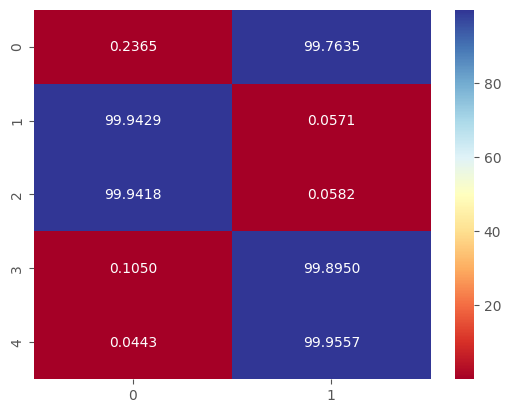

In [32]:
sns.heatmap(y_xgb_prob[:TOP_K], annot=True, cmap=COLOR_MAP, fmt=".4f");

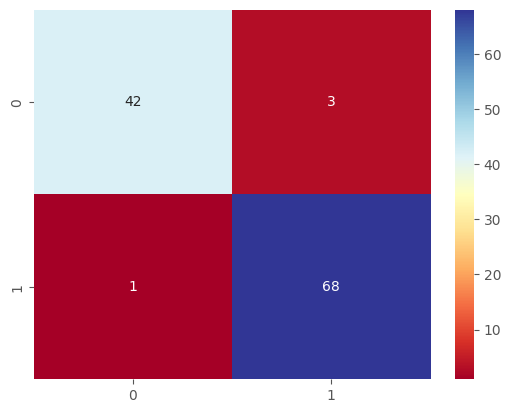

In [33]:
sns.heatmap(cm_xgb, annot=True, cmap=COLOR_MAP, fmt=".0f");

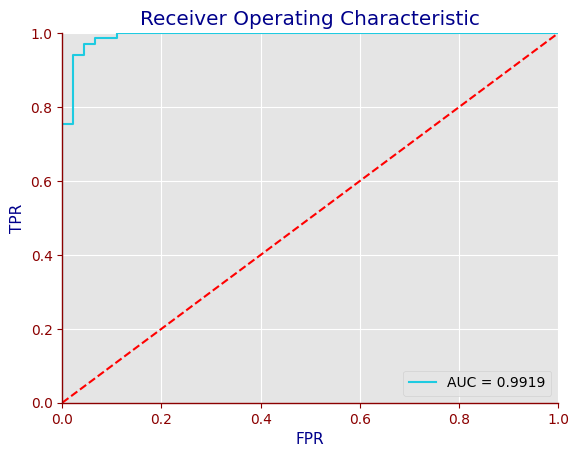

In [34]:
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_xgb_prob[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plot_roc(fpr_xgb, tpr_xgb, roc_auc_xgb)

In [35]:
accuracy_score(y_test, y_xgb_pred)

0.9649122807017544

In [36]:
Markdown(classification_report(y_test, y_xgb_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        45
           1       0.96      0.99      0.97        69

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114
